<a href="https://colab.research.google.com/github/amir-shah-mmu/T2430_CCS6314_TC3L_H/blob/main/Cryptography_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
import time
import numpy as np
import math
import random
import pandas as pd
from tabulate import tabulate

from sympy import mod_inverse

#Affine Cipher (Substitution Cipher)

In [ ]:
def affine_encrypt(text, a, b):
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            char = char.upper()
            # (ax + b)mod 26
            encrypted_text += chr(((a * (ord(char) - 65) + b) % 26) + 65)
        else:
            encrypted_text += char
    return encrypted_text

In [ ]:
def affine_decrypt(ciphertext_affine, a, b):
    decrypted_text = ""
    #check for modular inverse
    a_inv = mod_inverse(a, 26)
    if a_inv is None:
        return "No modular inverse found. Choose a different number."

    for char in ciphertext_affine:
        if char.isalpha():
            char = char.upper()
            # a^-1  (y-b) mod 26
            decrypted_text += chr(((a_inv * (ord(char) - 65 - b)) % 26) + 65)
        else:
            decrypted_text += char
    return decrypted_text

In [ ]:
#user input for Affine Cipher

print("\033[1m" + "Affine Cipher" + "\033[0m")
plaintext = input("Enter plaintext: ")

# Ensure 'a' is coprime with 26
while True:
    a = int(input("Enter value for a (must be coprime with 26): "))
    if math.gcd(a, 26) == 1:  # Check if a is coprime with 26
        break
    print("No modular inverse found. Choose a different number.")

b = int(input("Enter value for b: "))

print(f"\nplaintext = \"{plaintext}\"")
print(f"a = {a}")
print(f"b = {b}\n")

ciphertext_affine = affine_encrypt(plaintext, a, b)
decrypted_text = affine_decrypt(ciphertext_affine, a, b)

print("Original Text:", plaintext)
print("Affine Encrypted Text:", ciphertext_affine)
print("Affine Decrypted Text:", decrypted_text)

Affine Cipher
Enter plaintext: ASSIGNMENT
Enter value for a (must be coprime with 26): 4
No modular inverse found. Choose a different number.
Enter value for a (must be coprime with 26): 11
Enter value for b: 5

plaintext = "ASSIGNMENT"
a = 11
b = 5

Original Text: ASSIGNMENT
Affine Encrypted Text: FVVPTSHXSG
Affine Decrypted Text: ASSIGNMENT


# Double Columnar Transposition Cipher

In [ ]:
def columnar_encrypt(text, key):
    # Determine column order based on key sorting
    key_order = sorted(list(key))
    num_cols = len(key)
    num_rows = math.ceil(len(text) / num_cols)

    grid = [['' for _ in range(num_cols)] for _ in range(num_rows)]

    # Fill column in the correct order
    index = 0
    for row in range(num_rows):
        for col in range(num_cols):
            if index < len(text):
                grid[row][col] = text[index]
                index += 1

    # Read the grid row-wise to construct the ciphertext
    encrypted_text = ""
    for col in key_order:
        col_index = key.index(col)  # Find index based on original key order
        for row in range(num_rows):
            if grid[row][col_index] != '':
                encrypted_text += grid[row][col_index]

    return encrypted_text

def double_columnar_encrypt(text, key1, key2):
    first_pass = columnar_encrypt(text, key1)
    second_pass = columnar_encrypt(first_pass, key2)
    return second_pass

In [ ]:
def columnar_decrypt(ciphertext, key):
    num_cols = len(key)
    num_rows = math.ceil(len(ciphertext) / num_cols)

    # Determine column order based on key sorting
    key_order = sorted(list(enumerate(key)), key=lambda x: x[1])
    col_indices = [i for i, _ in key_order]  # Extract original column positions after sorting

    # Compute how many characters are in each column
    col_lengths = [num_rows] * num_cols  # Start by assuming full-length columns
    extra_chars = (num_cols * num_rows) - len(ciphertext)  # How many empty spaces?

    # Reduce last few columns that should have one less row
    for i in range(extra_chars):
        col_lengths[col_indices[-(i + 1)]] -= 1

    # Fill column in the correct order
    grid = [['' for _ in range(num_cols)] for _ in range(num_rows)]
    index = 0

    for col_index, col_length in zip(col_indices, col_lengths):
        for row in range(col_length):
            grid[row][col_index] = ciphertext[index]
            index += 1

    # Read the grid row-wise to reconstruct plaintext
    decrypted_text = ""
    for row in range(num_rows):
        for col in range(num_cols):
            if grid[row][col] != '':
                decrypted_text += grid[row][col]

    return decrypted_text

def double_columnar_decrypt(ciphertext, key1, key2):
    first_pass = columnar_decrypt(ciphertext, key2)
    second_pass = columnar_decrypt(first_pass, key1)
    return second_pass

In [ ]:
# User Input for Columnar Transposition Cipher
print("\033[1m" + "Double Columnar Transposition Cipher" + "\033[0m")
key1 = input("Enter key 1 for Columnar Transposition Cipher: ")
key2 = input("Enter key 2 for Columnar Transposition Cipher: ")

# Print input values
print(f"\nplaintext = {plaintext}")
print(f"a = {a}")
print(f"b = {b}")
print(f"Columnar Key = {key1} and {key2}\n")

# Encryption & Decryption
ciphertext_columnar = double_columnar_encrypt(plaintext, key1, key2)
decrypted_text_columnar = double_columnar_decrypt(ciphertext_columnar, key1, key2)

# Output results
print("Original Text:", plaintext)
print("Columnar Encrypted Text:", ciphertext_columnar)
print("Columnar Decrypted Text:", decrypted_text_columnar)

Double Columnar Transposition Cipher
Enter key 1 for Columnar Transposition Cipher: lay
Enter key 2 for Columnar Transposition Cipher: bid

plaintext = ASSIGNMENT
a = 11
b = 5
Columnar Key = lay and bid

Original Text: ASSIGNMENT
Columnar Encrypted Text: SATNEMNGIS
Columnar Decrypted Text: ASSIGNMENT


# Double Block/Columnar Transposition + Affine Cipher

In [ ]:
# Double Block/Columnar Transposition + Affine Cipher Encryption
def double_block_encrypt(text, a, b, key1, key2):
    # Step 1: Apply Affine Cipher
    affine_encrypted = affine_encrypt(text, a, b)

    # Step 2: Apply Double Coumnar Transposition
    transposition_encrypted = double_columnar_encrypt(affine_encrypted, key1, key2)

    return transposition_encrypted

# Double Block/Columnar Transposition + Affine Cipher Decryption
def double_block_decrypt(ciphertext, a, b, key1, key2):
    # Step 1: Reverse Columnar Transposition
    affine_encrypted = double_columnar_decrypt(ciphertext, key1, key2)

    # Step 2: Reverse Affine Cipher
    decrypted_text = affine_decrypt(affine_encrypted, a, b)

    return decrypted_text

# Print input values
print(f"\nplaintext = {plaintext}")
print(f"\nAffineCiphertext = {ciphertext_affine}")
print(f"a = {a}")
print(f"b = {b}")
print(f"Columnar Key = {key1} and {key2}\n")

# Encrypt
ciphertext = double_block_encrypt(plaintext, a, b, key1, key2)
# Decrypt
decrypted_text = double_block_decrypt(ciphertext, a, b, key1, key2)

# Print Output
print("\n\033[1mDouble Block/Columnar Transposition + Affine Cipher\033[0m")
print(f"Plaintext: {plaintext}")
print(f"Final Encrypted Text: {ciphertext}")
print(f"Final Decrypted Text: {decrypted_text}")


plaintext = ASSIGNMENT

AffineCiphertext = FVVPTSHXSG
a = 11
b = 5
Columnar Key = lay and bid


Double Block/Columnar Transposition + Affine Cipher
Plaintext: ASSIGNMENT
Final Encrypted Text: VFGSXHSTPV
Final Decrypted Text: ASSIGNMENT


# Analyze performance

In [ ]:
def analyze_performance(text_sizes, a, b, key1, key2):
    df = pd.DataFrame()
    results = []

    for size in text_sizes:
        text = ''.join(random.choice('ABCDEFGHIJKLMNOPQRSTUVWXYZ') for _ in range(size))

        # Affine Cipher
        start = time.time()
        affine_cipher_text = affine_encrypt(text, a, b)
        affine_encrypt_time = time.time() - start

        start = time.time()
        affine_decrypted_text = affine_decrypt(affine_cipher_text, a, b)
        affine_decrypt_time = time.time() - start

        # Columnar Transposition Cipher
        start = time.time()
        columnar_cipher_text = double_block_encrypt(text, a, b, key1, key2)
        columnar_encrypt_time = time.time() - start

        start = time.time()
        columnar_decrypted_text = double_columnar_decrypt(columnar_cipher_text, key1, key2)
        columnar_decrypt_time = time.time() - start

        # Product Cipher (Affine + Columnar)
        start = time.time()
        product_cipher_text = double_block_encrypt(text, a, b, key1, key2)
        product_encrypt_time = time.time() - start

        start = time.time()
        product_decrypted_text = double_block_decrypt(product_cipher_text, a, b, key1, key2)
        product_decrypt_time = time.time() - start

        results.append([
            size,
            affine_encrypt_time, affine_decrypt_time,
            columnar_encrypt_time, columnar_decrypt_time,
            product_encrypt_time, product_decrypt_time
        ])

    df = pd.DataFrame(results, columns=[
        "Text Size",
        "Affine Encrypt Time", "Affine Decrypt Time",
        "Double Columnar Encrypt Time", "Double Columnar Decrypt Time",
        "Product Encrypt Time", "Product Decrypt Time"
    ])

    return df


In [ ]:
# Running Analysis
results_df = analyze_performance([100, 500, 1000, 5000, 10000, 50000, 100000],a,b,key1,key2)
results_df

,Text Size,Affine Encrypt Time,Affine Decrypt Time,Double Columnar Encrypt Time,Double Columnar Decrypt Time,Product Encrypt Time,Product Decrypt Time
0,100,0.000035,0.000093,0.000129,0.000092,0.000100,0.000105
1,500,0.000121,0.000120,0.000561,0.000356,0.000493,0.000878
2,1000,0.000233,0.000256,0.001234,0.000762,0.001041,0.001603
3,5000,0.002987,0.006639,0.014165,0.013562,0.005788,0.005575
4,10000,0.002484,0.002566,0.155994,0.007706,0.010721,0.010342
5,50000,0.014531,0.012911,0.059551,0.044205,0.191598,0.055945
6,100000,0.024842,0.026076,0.324687,0.428850,0.384374,0.447439


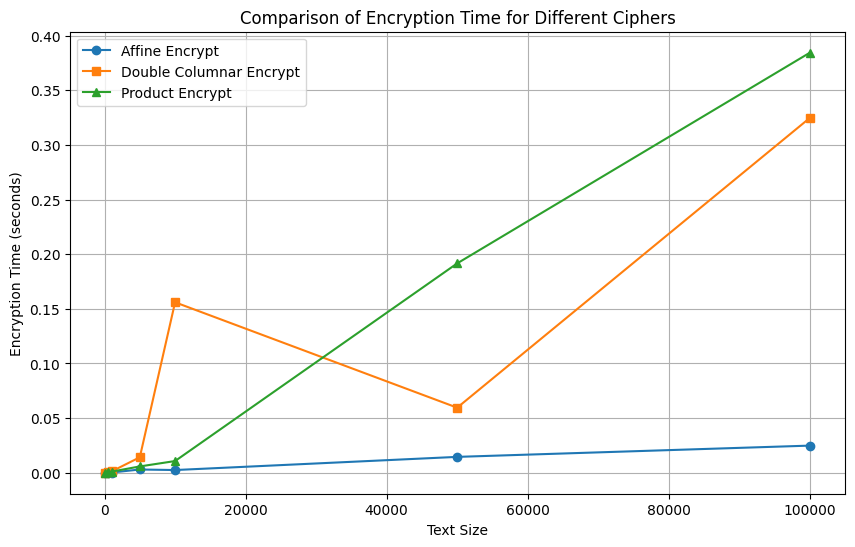

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(results_df["Text Size"], results_df["Affine Encrypt Time"], marker='o', label="Affine Encrypt")
plt.plot(results_df["Text Size"], results_df["Double Columnar Encrypt Time"], marker='s', label="Double Columnar Encrypt")
plt.plot(results_df["Text Size"], results_df["Product Encrypt Time"], marker='^', label="Product Encrypt")

plt.xlabel("Text Size")
plt.ylabel("Encryption Time (seconds)")
plt.title("Comparison of Encryption Time for Different Ciphers")
plt.legend()
plt.grid(True)
plt.show()

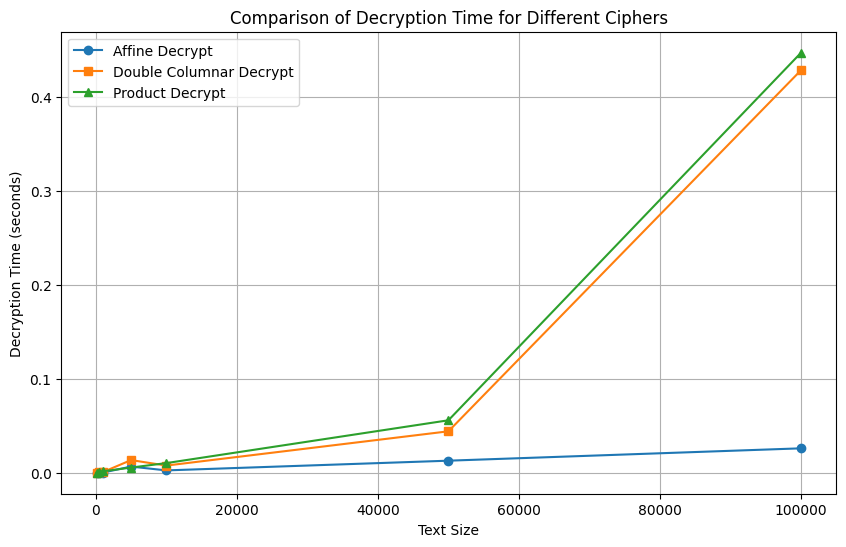

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df["Text Size"], results_df["Affine Decrypt Time"], marker='o', label="Affine Decrypt")
plt.plot(results_df["Text Size"], results_df["Double Columnar Decrypt Time"], marker='s', label="Double Columnar Decrypt")
plt.plot(results_df["Text Size"], results_df["Product Decrypt Time"], marker='^', label="Product Decrypt")

plt.xlabel("Text Size")
plt.ylabel("Decryption Time (seconds)")
plt.title("Comparison of Decryption Time for Different Ciphers")
plt.legend()
plt.grid(True)
plt.show()

# RSA and AES using CBC mode


In [ ]:
import random
import os

public_key = None
private_key = None
current_public_key_file = None
current_private_key_file = None
aes_key = None
current_aes_key_file = None

small_primes = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]

def is_prime(num): #Lecture 07 pg. 29
    #divisibility test
    if num < 2:                                 #primes starts from zero
        return False
    if num in small_primes:                     #direct check for primes below 100
        return True
    if any(num % p == 0 for p in small_primes): #check if divisible by smaller prime
        return False

    #Miller-Rabin test
    m = num - 1
    k = 0
    while m % 2 == 0:                           #find m and k
        m = m // 2
        k += 1

    T = pow(2, m, num)
    if T == 1 or T == num - 1:
        return True

    for _ in range(k):
        a = random.randrange(2, num - 1)
        T = pow(T, 2, num)
        if T == num - 1 or T == 1:
            continue

        for _ in range(k-1):
            T = pow(T, 2, num)
            if T == num -1:
                break
        else:
            return False
    return True


def prime_gen(bits=2048):
    while True:
        num = random.getrandbits(bits) | 1     #make sure the bit is odd
        if is_prime(num):
            return num


def gcd(a, b): #euclidean algorithm lecture 2 pg. 20
    while b > 0:
        q = a // b
        r = a - q * b
        a = b
        b = r
    return a

def rsa_key_gen(): #Lecture 9 pg. 12
    print("Generating new RSA keys (this may take some time)...")
    p = prime_gen()
    q = prime_gen()
    n = p * q
    phi_n = (p - 1) * (q - 1)
    for e in [3, 5, 17, 257, 65537]:
        if gcd(e, phi_n) == 1:
            break
    else:
        e = random.choice([i for i in range(2, phi_n) if gcd(i, phi_n) == 1])
    d = pow(e, -1, phi_n)
    return (e, n), (d, n)

def save_public_key_to_file(pub_key, filename):
    try:
        with open(filename, "w") as f:
            f.write(f"{pub_key[0]},{pub_key[1]}\n")
        print(f"Public RSA key saved to file '{filename}'.")
        return filename
    except Exception as e:
        print("Error saving public RSA key:", e)
        return None

def save_private_key_to_file(priv_key, filename):
    try:
        with open(filename, "w") as f:
            f.write(f"{priv_key[0]},{priv_key[1]}\n")
        print(f"Private RSA key saved to file '{filename}'.")
        return filename
    except Exception as e:
        print("Error saving private RSA key:", e)
        return None

def load_public_key_from_file(filename):
    if not os.path.exists(filename):
        print(f"File '{filename}' does not exist.")
        return None
    try:
        with open(filename, "r") as f:
            line = f.readline()
            if not line:
                print("Public key file is empty.")
                return None
            pub_parts = line.strip().split(',')
            pub = (int(pub_parts[0]), int(pub_parts[1]))
        print(f"Public RSA key loaded from file '{filename}'.")
        return pub
    except Exception as e:
        print("Error loading public RSA key:", e)
        return None

def load_private_key_from_file(filename):
    if not os.path.exists(filename):
        print(f"File '{filename}' does not exist.")
        return None
    try:
        with open(filename, "r") as f:
            line = f.readline()
            if not line:
                print("Private key file is empty.")
                return None
            priv_parts = line.strip().split(',')
            priv = (int(priv_parts[0]), int(priv_parts[1]))
        print(f"Private RSA key loaded from file '{filename}'.")
        return priv
    except Exception as e:
        print("Error loading private RSA key:", e)
        return None

def rsa_encrypt(message, key):
    e, n = key
    return pow(message, e, n)

def rsa_decrypt(ciphertext, key):
    d, n = key
    return pow(ciphertext, d, n)

def rsa_encrypt_text(message, pub_key):
    m_bytes = message.encode()                #character to bytes
    m_int = int.from_bytes(m_bytes, 'big')    #bytes to integers
    if m_int >= pub_key[1]:
        print("Message too large for RSA encryption with current key.")
        return None
    return rsa_encrypt(m_int, pub_key)

def rsa_decrypt_text(ciphertext_int, priv_key):
    m_int = rsa_decrypt(ciphertext_int, priv_key) #integers to bytes
    n = priv_key[1]
    byte_len = (n.bit_length() + 7) // 8          #to make sure there are no bits left out
    m_bytes = m_int.to_bytes(byte_len, 'big')
    return m_bytes.lstrip(b'\x00').decode()       #to make sure the extra bytes are left out

def rsa_encrypt_text_private(message, priv_key):
    m_bytes = message.encode()
    m_int = int.from_bytes(m_bytes, 'big')
    return rsa_encrypt(m_int, priv_key)  # Using private exponent for "encryption"

def rsa_decrypt_text_public(ciphertext_int, pub_key):
    m_int = rsa_decrypt(ciphertext_int, pub_key)  # Using public exponent for "decryption"
    n = pub_key[1]
    byte_len = (n.bit_length() + 7) // 8
    m_bytes = m_int.to_bytes(byte_len, 'big')
    return m_bytes.lstrip(b'\x00').decode()

sbox = [
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
]

inv_sbox = [0] * 256
for i in range(256):
    inv_sbox[sbox[i]] = i

rcon = [
    0x8d, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40, 0x80, 0x1b, 0x36,
    0x6c, 0xd8, 0xab, 0x4d, 0x9a, 0x2f, 0x5e, 0xbc, 0x63, 0xc6, 0x97,
    0x35, 0x6a, 0xd4, 0xb3, 0x7d, 0xfa, 0xef, 0xc5, 0x91, 0x39, 0x72,
    0xe4, 0xd3, 0xbd, 0x61, 0xc2, 0x9f, 0x25, 0x4a, 0x94, 0x33, 0x66,
    0xcc, 0x83, 0x1d, 0x3a, 0x74, 0xe8, 0xcb, 0x8d  # Extended as needed...
]

def key_expansion_core(word, i):
    word = word[1:] + word[:1]           # Rotate left
    word = [sbox[b] for b in word]         # Apply S-box
    word[0] ^= rcon[i]                     # XOR with Rcon
    return word

def key_expansion(input_key):
    expanded_keys = list(input_key)  # First 16 bytes: original key
    bytes_generated = 16
    rcon_iteration = 1
    while bytes_generated < 176: #AES required 11 round key (176 bytes total, including original key)
        temp = expanded_keys[bytes_generated - 4:bytes_generated] #put last 4 bytes of expanded key into temp
        if bytes_generated % 16 == 0: #apply key expansion every 16 bytes
            temp = key_expansion_core(temp, rcon_iteration)
            rcon_iteration += 1
        for i in range(4):
            expanded_keys.append(expanded_keys[bytes_generated - 16] ^ temp[i])
            bytes_generated += 1
    return expanded_keys

def sub_bytes(state):
    for i in range(16):
        state[i] = sbox[state[i]]

def inv_sub_bytes(state):
    for i in range(16):
        state[i] = inv_sbox[state[i]]

def shift_rows(state):
    state[:] = [
        state[0], state[5], state[10], state[15],
        state[4], state[9], state[14], state[3],
        state[8], state[13], state[2], state[7],
        state[12], state[1], state[6], state[11]
    ]

def inv_shift_rows(state):
    state[:] = [
        state[0], state[13], state[10], state[7],
        state[4], state[1], state[14], state[11],
        state[8], state[5], state[2], state[15],
        state[12], state[9], state[6], state[3]
    ]

def gmul(a, b):
    p = 0
    for _ in range(8):
        if b & 1:
            p ^= a
        hi_bit_set = a & 0x80
        a = (a << 1) & 0xFF
        if hi_bit_set:
            a ^= 0x1b
        b >>= 1
    return p

def mix_columns(state):
    tmp = state[:]
    for i in range(4):
        col = i * 4
        state[col]   = gmul(tmp[col], 2) ^ gmul(tmp[col+1], 3) ^ tmp[col+2] ^ tmp[col+3]
        state[col+1] = tmp[col] ^ gmul(tmp[col+1], 2) ^ gmul(tmp[col+2], 3) ^ tmp[col+3]
        state[col+2] = tmp[col] ^ tmp[col+1] ^ gmul(tmp[col+2], 2) ^ gmul(tmp[col+3], 3)
        state[col+3] = gmul(tmp[col], 3) ^ tmp[col+1] ^ tmp[col+2] ^ gmul(tmp[col+3], 2)

def inv_mix_columns(state):
    tmp = state[:]
    for i in range(4):
        col = i * 4
        state[col]   = gmul(tmp[col], 0x0e) ^ gmul(tmp[col+1], 0x0b) ^ gmul(tmp[col+2], 0x0d) ^ gmul(tmp[col+3], 0x09)
        state[col+1] = gmul(tmp[col], 0x09) ^ gmul(tmp[col+1], 0x0e) ^ gmul(tmp[col+2], 0x0b) ^ gmul(tmp[col+3], 0x0d)
        state[col+2] = gmul(tmp[col], 0x0d) ^ gmul(tmp[col+1], 0x09) ^ gmul(tmp[col+2], 0x0e) ^ gmul(tmp[col+3], 0x0b)
        state[col+3] = gmul(tmp[col], 0x0b) ^ gmul(tmp[col+1], 0x0d) ^ gmul(tmp[col+2], 0x09) ^ gmul(tmp[col+3], 0x0e)

def add_round_key(state, round_key):
    for i in range(16):
        state[i] ^= round_key[i]

def aes_encrypt_block(block, key):
    state = block[:]  # Copy block (list of 16 ints)
    expanded_key = key_expansion(key)
    add_round_key(state, key)
    for i in range(9):
        sub_bytes(state)
        shift_rows(state)
        mix_columns(state)
        add_round_key(state, expanded_key[16*(i+1):16*(i+2)])
    sub_bytes(state)
    shift_rows(state)
    add_round_key(state, expanded_key[160:176])
    return state

def aes_decrypt_block(block, key):
    state = block[:]  # Copy block
    expanded_key = key_expansion(key)
    add_round_key(state, expanded_key[160:176])
    inv_shift_rows(state)
    inv_sub_bytes(state)
    for round in range(9, 0, -1):
        add_round_key(state, expanded_key[16*round:16*(round+1)])
        inv_mix_columns(state)
        inv_shift_rows(state)
        inv_sub_bytes(state)
    add_round_key(state, key)
    return state

def xor_bytes(block1, block2):
    return [b1 ^ b2 for b1, b2 in zip(block1, block2)]

def pkcs7_pad(message):
    padding_len = 16 - (len(message) % 16)        #check for empty block
    return message + [padding_len] * padding_len  #store the number of empty block directly for easier unpadding

def pkcs7_unpad(padded):
    padding_len = padded[-1]                      #take the number of empty block
    if padding_len < 1 or padding_len > 16:       #check for wrong padding
        raise ValueError("Invalid padding")
    return padded[:-padding_len]                  #delete block that should be empty

def cbc_encrypt(plaintext, key, iv):
    padded = pkcs7_pad(plaintext)
    ciphertext = []
    previous = iv
    for i in range(0, len(padded), 16):
        block = padded[i:i+16]
        block = xor_bytes(block, previous)
        encrypted = aes_encrypt_block(block, key)
        ciphertext.extend(encrypted)
        previous = encrypted
    return iv + ciphertext

def cbc_decrypt(ciphertext, key):
    iv = ciphertext[:16]
    ciphertext = ciphertext[16:]
    plaintext = []
    previous = iv
    for i in range(0, len(ciphertext), 16):
        block = ciphertext[i:i+16]
        decrypted = aes_decrypt_block(block, key)
        plain_block = xor_bytes(decrypted, previous)
        plaintext.extend(plain_block)
        previous = block
    return pkcs7_unpad(plaintext)

def flip_bit(byte_val, bit_index):
    mask = 1 << bit_index
    return byte_val ^ mask

def simulate_bit_error(ciphertext, byte_index, bit_index):
    ciphertext_list = list(ciphertext)
    ciphertext_list[byte_index] = flip_bit(ciphertext_list[byte_index], bit_index)
    return bytes(ciphertext_list)

def print_hex(byte_list):
    print(" ".join(f"{b:02X}" for b in byte_list))

def bytes_to_list(b):
    return list(b)

def list_to_bytes(lst):
    return bytes(lst)

def aes_encrypt(plaintext, key_bytes):
    plaintext_list = list(plaintext.encode())
    key_list = list(key_bytes)
    iv = [random.randint(0, 255) for _ in range(16)]
    ciphertext_list = cbc_encrypt(plaintext_list, key_list, iv)
    return list_to_bytes(ciphertext_list)

def aes_decrypt(ciphertext, key_bytes):
    ciphertext_list = list(ciphertext)
    key_list = list(key_bytes)
    plaintext_list = cbc_decrypt(ciphertext_list, key_list)
    return list_to_bytes(plaintext_list).decode()

def aes_decrypt_raw(ciphertext, key_bytes):
    ciphertext_list = list(ciphertext)
    key_list = list(key_bytes)
    plaintext_list = []
    iv = ciphertext_list[:16]
    previous = iv
    # without unpadding
    for i in range(16, len(ciphertext_list), 16):
        block = ciphertext_list[i:i+16]
        decrypted = aes_decrypt_block(block, key_list)
        plain_block = xor_bytes(decrypted, previous)
        plaintext_list.extend(plain_block)
        previous = block
    return list_to_bytes(plaintext_list)

def bit_error():
    global aes_key

    text = input("Enter a text message: ")
    text_bytes = text.encode()
    if len(text_bytes) < 16:
        text_bytes = text_bytes.ljust(16, b'\x00')
    else:
        text_bytes = text_bytes[:16]
    print("\nOriginal text (16 bytes, hex):", text_bytes.hex())

    if aes_key is None:
        aes_int = random.getrandbits(128)
        aes_key = aes_int.to_bytes(16, byteorder='big')
        print("Generated AES key (hex):", aes_key.hex())

    iv = bytes([random.randint(0, 255) for _ in range(16)])
    print("IV (hex):", iv.hex())

    key_list = list(aes_key)
    plaintext_list = list(text_bytes)
    iv_list = list(iv)

    xor_block = xor_bytes(plaintext_list, iv_list)
    ciphertext_block = aes_encrypt_block(xor_block, key_list)
    ciphertext = iv_list + ciphertext_block
    ciphertext_bytes = bytes(ciphertext)
    print("\nCiphertext (hex):", ciphertext_bytes.hex())

    byte_index = 20
    bit_index = 3
    corrupted_ciphertext = simulate_bit_error(ciphertext_bytes, byte_index, bit_index)
    print("\nCorrupted ciphertext (hex):", corrupted_ciphertext.hex())

    # Decrypt both original and corrupted ciphertexts
    decrypted_original = aes_decrypt_raw(ciphertext_bytes, aes_key)
    decrypted_corrupted = aes_decrypt_raw(corrupted_ciphertext, aes_key)
    print("\nCorrupted plaintext (hex):",decrypted_original.hex())
    print("\nCorrupted plaintext (hex):", decrypted_corrupted.hex())

def save_aes_key_to_file(key, filename):
    try:
        with open(filename, "w") as f:
            f.write(aes_key.hex())
        print(f"AES key saved to file '{filename}'.")
        return filename
    except Exception as e:
        print("Error saving AES key:", e)
        return None

def load_aes_key_from_file(filename):
    if not os.path.exists(filename):
        print(f"File '{filename}' does not exist.")
        return None
    try:
        with open(filename, "r") as f:
            hex_key = f.read().strip()
            if len(hex_key) != 32:
                print("Invalid AES key in file.")
                return None
            key = bytes.fromhex(hex_key)
        print(f"AES key loaded from file '{filename}'.")
        return key
    except Exception as e:
        print("Error loading AES key:", e)
        return None

def display_status():
    print("\n--- Current Key Status ---")
    print("RSA Public Key File:", current_public_key_file if current_public_key_file else "none")
    print("RSA Private Key File:", current_private_key_file if current_private_key_file else "none")
    print("AES Key File:", current_aes_key_file if current_aes_key_file else "none")
    if aes_key:
        print("AES Key (hex):", aes_key.hex())
    else:
        print("AES Key: not loaded.")
    print("--------------------------\n")

def rsa_menu():
    while True:
        print("\n--- RSA Operations ---")
        print("1. Generate new RSA key pair")
        print("2. Load RSA public key")
        print("3. Load RSA private key")
        print("4. Save RSA public key")
        print("5. Save RSA private key")
        print("6. View RSA keys")
        print("7. Encrypt RSA text")
        print("8. Decrypt RSA text")
        print("9. Return to Main Menu")
        choice = input("Enter your choice: ").strip()
        global public_key, private_key, current_public_key_file, current_private_key_file
        if choice == "1":
            public_key, private_key = rsa_key_gen()
            current_public_key_file = None
            current_private_key_file = None
            print("New RSA key pair generated (not saved).")
        elif choice == "2":
            filename = input("Enter filename to load RSA public key: ").strip()
            pub = load_public_key_from_file(filename)
            if pub:
                public_key = pub
                current_public_key_file = filename
        elif choice == "3":
            filename = input("Enter filename to load RSA private key: ").strip()
            priv = load_private_key_from_file(filename)
            if priv:
                private_key = priv
                current_private_key_file = filename
        elif choice == "4":
            if public_key:
                filename = input("Enter filename to save RSA public key: ").strip()
                saved = save_public_key_to_file(public_key, filename)
                if saved:
                    current_public_key_file = saved
            else:
                print("No RSA public key available.")
        elif choice == "5":
            if private_key:
                filename = input("Enter filename to save RSA private key: ").strip()
                saved = save_private_key_to_file(private_key, filename)
                if saved:
                    current_private_key_file = saved
            else:
                print("No RSA private key available.")
        elif choice == "6":
            print("\nCurrent RSA Key Values:")
            if public_key:
                print("  Public Key (e, n):", public_key)
            else:
                print("  Public Key: not loaded")
            if private_key:
                print("  Private Key (d, n):", private_key)
            else:
                print("  Private Key: not loaded")
        elif choice == "7":
            if public_key is None and private_key is None:
                print("No RSA keys loaded. Generate or load keys first.")
                continue
            sub_choice = input("Encrypt with (1) Public key or (2) Private key? ").strip()
            msg = input("Enter message to encrypt: ")
            if sub_choice == "1":
                if public_key:
                    c = rsa_encrypt_text(msg, public_key)
                    if c is not None:
                        print("RSA Encrypted message (using public key, integer):", c)
                else:
                    print("RSA public key not loaded.")
            elif sub_choice == "2":
                if private_key:
                    c = rsa_encrypt_text_private(msg, private_key)
                    if c is not None:
                        print("RSA 'Encrypted' (signed) message (using private key, integer):", c)
                else:
                    print("RSA private key not loaded.")
            else:
                print("Invalid choice.")
        elif choice == "8":
            if public_key is None and private_key is None:
                print("No RSA keys loaded. Generate or load keys first.")
                continue
            sub_choice = input("Decrypt with (1) Private key or (2) Public key? ").strip()
            try:
                c_str = input("Enter RSA ciphertext (integer): ").strip()
                c_int = int(c_str)
            except Exception as e:
                print("Invalid ciphertext format.")
                continue
            if sub_choice == "1":
                if private_key:
                    msg = rsa_decrypt_text(c_int, private_key)
                    print("RSA Decrypted message (with private key):", msg)
                else:
                    print("RSA private key not loaded.")
            elif sub_choice == "2":
                if public_key:
                    msg = rsa_decrypt_text_public(c_int, public_key)
                    print("RSA Decrypted message (with public key):", msg)
                else:
                    print("RSA public key not loaded.")
            else:
                print("Invalid choice.")
        elif choice == "9":
            break
        else:
            print("Invalid choice.")

def aes_menu():
    global aes_key, current_aes_key_file
    while True:
        print("\n--- AES Operations ---")
        print("1. Generate new AES key")
        print("2. Load AES key")
        print("3. Save AES key")
        print("4. View AES key")
        print("5. AES Encrypt message")
        print("6. AES Decrypt message")
        print("7. Test Bit Error")
        print("8. Return to Main Menu")
        choice = input("Enter your choice: ").strip()
        if choice == "1":
            aes_int = random.getrandbits(128)
            aes_key = aes_int.to_bytes(16, byteorder='big')
            current_aes_key_file = None
            print("New AES key generated:", aes_key.hex())
        elif choice == "2":
            filename = input("Enter filename to load AES key: ").strip()
            key_loaded = load_aes_key_from_file(filename)
            if key_loaded:
                aes_key = key_loaded
                current_aes_key_file = filename
        elif choice == "3":
            if aes_key:
                filename = input("Enter filename to save AES key: ").strip()
                saved = save_aes_key_to_file(aes_key, filename)
                if saved:
                    current_aes_key_file = saved
            else:
                print("No AES key available.")
        elif choice == "4":
            if aes_key:
                print("AES key (hex):", aes_key.hex())
            else:
                print("AES key not loaded/generated.")
        elif choice == "5":
            if aes_key:
                message = input("Enter message to encrypt with AES key: ")
                ciphertext = aes_encrypt(message, aes_key)
                print("AES Encrypted message (Hex):", ciphertext.hex())
            else:
                print("AES key not loaded/generated.")
        elif choice == "6":
            if aes_key:
                ciphertext_hex = input("Enter AES ciphertext (Hex): ").strip()
                try:
                    ciphertext = bytes.fromhex(ciphertext_hex)
                    message = aes_decrypt(ciphertext, aes_key)
                    print("AES Decrypted message:", message)
                except Exception as e:
                    print("AES decryption failed:", e)
            else:
                print("AES key not loaded/generated.")
        elif choice == "7":
            bit_error()
        elif choice == "8":
            break
        else:
            print("Invalid choice.")

def main_menu():
    while True:
        display_status()
        print("=== Main Menu ===")
        print("1. RSA Operations")
        print("2. AES Operations")
        print("3. Quit")
        choice = input("Enter your choice: ").strip()
        if choice == "1":
            rsa_menu()
        elif choice == "2":
            aes_menu()
        elif choice == "3":
            print("Exiting program.")
            break
        else:
            print("Invalid choice.")

main_menu()


--- Current Key Status ---
RSA Public Key File: none
RSA Private Key File: none
AES Key File: none
AES Key: not loaded.
--------------------------

=== Main Menu ===
1. RSA Operations
2. AES Operations
3. Quit

--- RSA Operations ---
1. Generate new RSA key pair
2. Load RSA public key
3. Load RSA private key
4. Save RSA public key
5. Save RSA private key
6. View RSA keys
7. Encrypt RSA text
8. Decrypt RSA text
9. Return to Main Menu
Generating new RSA keys (this may take some time)...
New RSA key pair generated (not saved).

--- RSA Operations ---
1. Generate new RSA key pair
2. Load RSA public key
3. Load RSA private key
4. Save RSA public key
5. Save RSA private key
6. View RSA keys
7. Encrypt RSA text
8. Decrypt RSA text
9. Return to Main Menu
Public RSA key saved to file 'personB.pub'.

--- RSA Operations ---
1. Generate new RSA key pair
2. Load RSA public key
3. Load RSA private key
4. Save RSA public key
5. Save RSA private key
6. View RSA keys
7. Encrypt RSA text
8. Decrypt RSA